In [2]:
#https://medium.com/analytics-vidhya/build-your-own-technical-analysis-stock-screener-using-python-5d1bb3d091f0
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
filepath = 'C:/Users/Wai/OneDrive/Desktop/Stocks-Demo/'
pd.set_option("display.precision",4)
df = pd.read_csv(filepath + 'klse_stocks_v2.csv')#.set_index('Date')
df2 = pd.read_csv(filepath + 'klse.csv')
%matplotlib inline

In [3]:
df.tail(5)

Date    ^KLSE  1015.KL  1023.KL  1066.KL  1082.KL  1155.KL  \
249  2022-09-05  1489.80     4.02     5.48     5.78    19.10     8.94   
250  2022-09-06  1488.27     4.04     5.46     5.74    19.12     8.90   
251  2022-09-07  1491.35     4.05     5.40     5.77    19.08     8.93   
252  2022-09-08  1494.73     4.05     5.40     5.77    19.14     8.95   
253  2022-09-09  1496.53     4.06     5.44     5.76    19.30     8.97   

     1171.KL  1295.KL  1562.KL  ...  7084.KL  7106.KL  7113.KL  7153.KL  \
249    0.585     4.67     1.87  ...   5.0843    0.745    0.820     1.01   
250    0.590     4.66     1.86  ...   4.9751    0.740    0.800     1.01   
251    0.590     4.64     1.85  ...   4.9751    0.755    0.805     1.01   
252    0.595     4.64     1.87  ...   4.9850    0.760    0.795     1.03   
253    0.600     4.69     1.84  ...   5.0600    0.750    0.795     1.02   

     7277.KL  7293.KL  8583.KL  8664.KL  9059.KL  9679.KL  
249     2.24     2.11    0.615    0.715     1.03    0.445  
250     2.25     2.14    0.620    0.705     1.03    0.455  
251     2.21     2.27    0.635    0.700     1.05    0.455  
252     2.22     2.31    0.625    0.710     1.02    0.455  
253     2.23     2.27    0.630    0.720     1.03    0.445  

[5 rows x 92 columns]

In [4]:
df1 = df[['Date','1295.KL','5200.KL', '5209.KL', '4863.KL','5819.KL']]
df1.tail()

Date  1295.KL  5200.KL  5209.KL  4863.KL  5819.KL
249  2022-09-05     4.67     1.74     3.54     5.80    20.90
250  2022-09-06     4.66     1.74     3.55     5.80    20.88
251  2022-09-07     4.64     1.73     3.55     5.81    20.88
252  2022-09-08     4.64     1.76     3.49     5.90    20.86
253  2022-09-09     4.69     1.72     3.50     5.81    20.88

In [5]:
df1 = df1.set_index('Date')
df1.head()

1295.KL  5200.KL  5209.KL  4863.KL  5819.KL
Date                                                   
2021-09-01   3.9371   1.5409   2.5452   5.8566  18.4013
2021-09-02   3.9275   1.5409   2.5264   5.8664  18.6347
2021-09-03   3.9854   1.5409   2.5358   5.8957  18.4791
2021-09-06   3.9468   1.5409   2.5546   5.8957  18.4013
2021-09-07   3.9564   1.5504   2.5546   5.9054  18.3819

In [6]:
for i in df1.columns:
    #x = df1.columns[i]
    for j in range(df2.shape[0]):
        if i == df2.code1.iloc[j]:
            print(df2.name.iloc[j])
            break

PUBLIC BANK BERHAD
UOA DEVELOPMENT BHD
GAS MALAYSIA BERHAD
TELEKOM MALAYSIA BERHAD
HONG LEONG BANK BERHAD


In [7]:
#stocks_list = ['HWM', 'AKAM', 'ABT', 'SPDN']
w = [0.1479, 0.141,0.2631, 0.1834,0.2643]
#w =[0.2421, 0.2763, 0.1608, 0.159, 0.1615]
sum(w)

0.9997

In [8]:
k = 0
windows = 10#20
window_size = df1.shape[0]
windows_forward = window_size - windows

import numpy as np
p = []
for j in range(windows_forward):
    
    prices1 = df1.iloc[k:windows,].mean()
    port_price = np.dot(w,prices1)
    #print('Mean Price: ', port_price)
    #print(prices1)
    k = k+1
    windows = windows + 1
    p.append(port_price)
    

In [9]:
window_size = df1.shape[0]

pp = pd.DataFrame()
pp = pd.DataFrame()
win = [10,20,30,40]
for i in win:
    p = []
    k = 0
    windows = i
    windows_forward = window_size - i
    
    for j in range(windows_forward):
    
        prices1 = df1.iloc[k:windows,].mean()
        port_price = np.dot(w,prices1)
    #print('Mean Price: ', port_price)
    #print(prices1)
        k = k+1
        windows = windows + 1
        p.append(port_price)
    p1 = pd.DataFrame(p)
    pp = pd.concat([pp,p1],axis =1)

<AxesSubplot:>

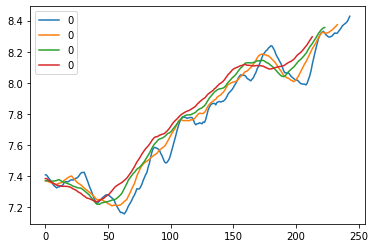

In [10]:
pp.plot()

In [11]:
# print(pp.iloc[:,0].mean()/pp.iloc[:,0].std())
# print(pp.iloc[:,1].mean()/pp.iloc[:,1].std())
# print(pp.iloc[:,2].mean()/pp.iloc[:,2].std())
# print(pp.iloc[:,3].mean()/pp.iloc[:,3].std())
# print(pp.iloc[:,4].mean()/pp.iloc[:,4].std())

In [12]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # plt.xlim(0,140)
# # plt.ylim(80,115)
# # pp.plot(figsize=(15,15),subplots=True,grid=True)

# pp.plot(figsize=(15,15),subplots=True,xlim=(0,360),ylim=(4,7),grid=True)


In [13]:
prices = pd.DataFrame(pp)
prices.plot(figsize=(15,8),grid=True)

<AxesSubplot:>

In [14]:
df1.plot(figsize=(12,15),subplots=True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

In [109]:
l = df1.shape[1]
l

5

In [110]:
ll = l+l
ll

10

In [63]:
df1.head()

1295.KL  5200.KL  5209.KL  4863.KL  5819.KL
Date                                                   
2021-09-01   3.9371   1.5409   2.5452   5.8566  18.4013
2021-09-02   3.9275   1.5409   2.5264   5.8664  18.6347
2021-09-03   3.9854   1.5409   2.5358   5.8957  18.4791
2021-09-06   3.9468   1.5409   2.5546   5.8957  18.4013
2021-09-07   3.9564   1.5504   2.5546   5.9054  18.3819

In [113]:
def dataframe(df,ma):
    df2 = df.copy()
    df2['raw'] = df2.iloc[:,:l].apply(lambda x: np.sum(x * w),axis=1)
    for i in df2.columns:
        df2['{}_avg'.format(i)] = df2[i].rolling(window=ma).mean()
    df2 = df2.dropna()
    df2['avg'] = df2.iloc[:,l:ll].apply(lambda x: np.sum(x * w),axis=1)
    return df2
    

In [112]:
df4 = dataframe(df1,10)
df4

1295.KL  5200.KL  5209.KL  4863.KL  5819.KL     raw  1295.KL_avg  \
Date                                                                           
2021-09-14   3.9319   1.5409   2.5546   5.9056  17.9539  7.2992       3.9593   
2021-09-15   3.9417   1.5598   2.5546   5.8957  18.2651  7.3838       3.9598   
2021-09-17   3.9908   1.5504   2.5546   5.7871  18.1873  7.3492       3.9661   
2021-09-20   3.9515   1.5409   2.5452   5.7772  18.1873  7.3378       3.9627   
2021-09-21   3.9613   1.5409   2.5264   5.7574  18.0901  7.3050       3.9642   
...             ...      ...      ...      ...      ...     ...          ...   
2022-09-05   4.6700   1.7400   3.5400   5.8000  20.9000  8.4550       4.6390   
2022-09-06   4.6600   1.7400   3.5500   5.8000  20.8800  8.4509       4.6460   
2022-09-07   4.6400   1.7300   3.5500   5.8100  20.8800  8.4483       4.6500   
2022-09-08   4.6400   1.7600   3.4900   5.9000  20.8600  8.4480       4.6520   
2022-09-09   4.6900   1.7200   3.5000   5.8100  20.8800  8.4412       4.6600   

            5200.KL_avg  5209.KL_avg  4863.KL_avg  5819.KL_avg  raw_avg  \
Date                                                                      
2021-09-14       1.5457       2.5489       5.9006      18.3566   7.4080   
2021-09-15       1.5475       2.5499       5.9045      18.3429   7.4057   
2021-09-17       1.5485       2.5527       5.8966      18.2982   7.3942   
2021-09-20       1.5485       2.5536       5.8848      18.2690   7.3841   
2021-09-21       1.5485       2.5508       5.8709      18.2379   7.3728   
...                 ...          ...          ...          ...      ...   
2022-09-05       1.7280       3.4270       5.8440      20.7420   8.3853   
2022-09-06       1.7280       3.4410       5.8540      20.7500   8.3940   
2022-09-07       1.7310       3.4510       5.8700      20.7860   8.4101   
2022-09-08       1.7370       3.4570       5.8950      20.8260   8.4279   
2022-09-09       1.7350       3.4650       5.8810      20.8460   8.4337   

               avg  
Date                
2021-09-14  4.0715  
2021-09-15  4.0858  
2021-09-17  4.0802  
2021-09-20  4.0751  
2021-09-21  4.0663  
...            ...  
2022-09-05  4.5323  
2022-09-06  4.5379  
2022-09-07  4.5449  
2022-09-08  4.5545  
2022-09-09  4.5518  

[245 rows x 13 columns]

In [146]:
#https://python-bloggers.com/2022/08/hyperparameter-tuning-a-transformer-with-optuna/

def objective(trial):
    ma = trial.suggest_int('ma',5,25)
    #upper = trial.suggest_loguniform('upper',0.05,0.2)
    #lower = trial.suggest_loguniform('lower',-0.2,-0.05)
    upper = trial.suggest_float('upper',0.05,0.2)
    lower = trial.suggest_float('lower',-0.2,-0.05)
    sl = trial.suggest_float('sl',0.9,0.98)
    df3 = dataframe(df1,ma)
    #print(df3.head())
    df3['shifted_price'] = df3.raw.shift()
    cond = [df3.raw - df3.raw_avg > upper, df3.raw - df3.raw_avg < lower]
    choices = ['Buy','Sell']
    df3['Signal'] = np.select(cond,choices)
    df3.Signal = df3.Signal.shift()
    fees = 0.004
    position = False
    buydates,selldates = [],[]
    buyprices,sellprices = [],[]
    #print('raw',df3.raw)
    #print('avg',df3.avg)
    for index,row in df3.iterrows():
        if not position and row['Signal'] == 'Buy':
            buydates.append(index)
            buyprice1 = row.raw + (row.raw*fees)
            #buyprice1 = row.shifted_price + (row.shifted_price*fees)
            #print('Buy ',buyprice1)
             #print(buyprices)
            #buyprices.append(row.raw)
            buyprices.append(buyprice1)
            position = True
        
        if position:
            if row['Signal'] == 'Sell' or row.shifted_price < sl * buyprices[-1]:
                selldates.append(index)
                sellprice1 = row.raw - (row.raw*fees)
            #sellprice1 = row.shifted_price - (row.shifted_price*fees)
                #print('Sell ',sellprice1)
                sellprices.append(sellprice1)
                
                position = False
        profit = (pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod()
    #print('Counts: ',df3.Signal.value_counts())
    return profit

In [147]:
#logging.info('Start training...')
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=200) #n_trials=100)

[I 2022-09-12 21:05:19,789] A new study created in memory with name: no-name-6e34e160-6b2b-439d-9131-83e8362c68b9
<ipython-input-146-bb95a9ef4bd7>:43: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

[I 2022-09-12 21:05:19,941] Trial 0 finished with value: 0.993295560236786 and parameters: {'ma': 23, 'upper': 0.19013853392907842, 'lower': -0.09776325131607534, 'sl': 0.9021682892606178}. Best is trial 0 with value: 0.993295560236786.
[I 2022-09-12 21:05:20,061] Trial 1 finished with value: 1.0222515365703453 and parameters: {'ma': 24, 'upper': 0.0713164880730355, 'lower': -0.18560602528428372, 'sl': 0.9338274769790109}. Best is trial 1 with value: 1.0222515365703453.
[I 2022-09-12 21:05:20,185] Trial 2 finished with value: 1.0285373446795185 and parameters: {'ma': 19, 'upper': 0.18923080935091008, 'lower': -0.0920884071478372, 'sl': 0.9231503135575787}. Best is trial 2 

In [148]:
trial = study.best_trial
print('Profit: {}'.format(trial.value))  

Profit: 1.0756836272261856


In [149]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'ma': 11, 'upper': 0.16597345003838684, 'lower': -0.1472495805495342, 'sl': 0.9118221751864851}


In [150]:
optuna.visualization.plot_param_importances(study)

In [127]:
optuna.visualization.plot_parallel_coordinate(study)

In [15]:
df1['raw'] = df1.iloc[:,:l].apply(lambda x: np.sum(x * w),axis=1)

In [35]:
df1.raw.shape , df['^KLSE'].shape

((254,), (254,))

In [37]:
df1['1295.KL'].corr(df1['5200.KL'])

0.7496488716779358

In [40]:
df1.corr()

1295.KL  5200.KL  5209.KL  4863.KL  5819.KL     raw
1295.KL   1.0000   0.7496   0.6833  -0.3460   0.9377  0.9225
5200.KL   0.7496   1.0000   0.5754  -0.1720   0.6940  0.7225
5209.KL   0.6833   0.5754   1.0000   0.2167   0.7106  0.8614
4863.KL  -0.3460  -0.1720   0.2167   1.0000  -0.3855 -0.1346
5819.KL   0.9377   0.6940   0.7106  -0.3855   1.0000  0.9612
raw       0.9225   0.7225   0.8614  -0.1346   0.9612  1.0000

In [36]:
a = df['^KLSE'].values
b = df1.raw.values
np.corrcoef(a,b)[0, 1]

-0.2083262062020545

In [39]:
a = df['^KLSE'].values
b = df1['1295.KL'].values
np.corrcoef(a,b)[0, 1]

0.018261776782371508

In [56]:
#plt.plot(df['^KLSE'])
plt.plot(df1.raw.pct_change())

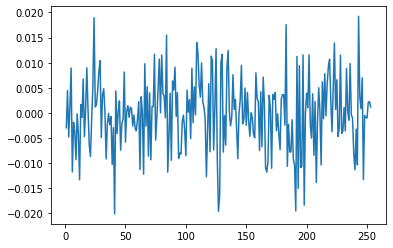

In [57]:
plt.plot(df['^KLSE'].pct_change())

In [24]:
df1.head()

1066.KL  5200.KL  1023.KL  2445.KL  1066.KL_avg  5200.KL_avg  \
Date                                                                       
2021-09-29   5.1293   1.5504   4.6982  19.2493       5.0669       1.5471   
2021-09-30   5.0920   1.5693   4.6689  19.3262       5.0641       1.5485   
2021-10-01   5.1200   1.5977   4.5908  19.0956       5.0678       1.5513   
2021-10-04   5.1573   1.6071   4.5908  19.1917       5.0697       1.5546   
2021-10-05   5.0806   1.6071   4.6103  19.3838       5.0700       1.5579   

            1023.KL_avg  2445.KL_avg     raw  
Date                                          
2021-09-29       4.6403      19.7603  8.8195  
2021-09-30       4.6401      19.7036  8.8321  
2021-10-01       4.6350      19.6422  8.7446  
2021-10-04       4.6276      19.5692  8.7838  
2021-10-05       4.6211      19.5394  8.8377

In [16]:
ll = l+l
ll

10

In [17]:
df1['avg'] = df1.iloc[:,l:ll].apply(lambda x: np.sum(x * w),axis=1)
df1.head()

1295.KL  5200.KL  5209.KL  4863.KL  5819.KL  1295.KL_avg  \
Date                                                                   
2021-09-29   4.0302   1.5504   2.5734   5.6883  18.2651       3.9726   
2021-09-30   4.0007   1.5693   2.5734   5.6290  18.3819       3.9758   
2021-10-01   3.9712   1.5977   2.5523   5.6389  18.5764       3.9780   
2021-10-04   3.9613   1.6071   2.5428   5.6587  18.2651       3.9768   
2021-10-05   3.9908   1.6071   2.5619   5.6587  18.2262       3.9790   

            5200.KL_avg  5209.KL_avg  4863.KL_avg  5819.KL_avg     raw     avg  
Date                                                                            
2021-09-29       1.5471       2.5414       5.8256      18.2603  7.3624  7.3689  
2021-09-30       1.5485       2.5428       5.8142      18.2593  7.3807  7.3676  
2021-10-01       1.5513       2.5441       5.8028      18.2564  7.4280  7.3658  
2021-10-04       1.5546       2.5445       5.7910      18.2457  7.3468  7.3612  
2021-10-05       1.5579       2.5448       5.7791      18.2369  7.3459  7.3576

In [18]:
df1['raw_chg'] = df1['raw'].pct_change(1)
df1['avg_chg'] = df1['avg'].pct_change(1)

<AxesSubplot:xlabel='Date'>

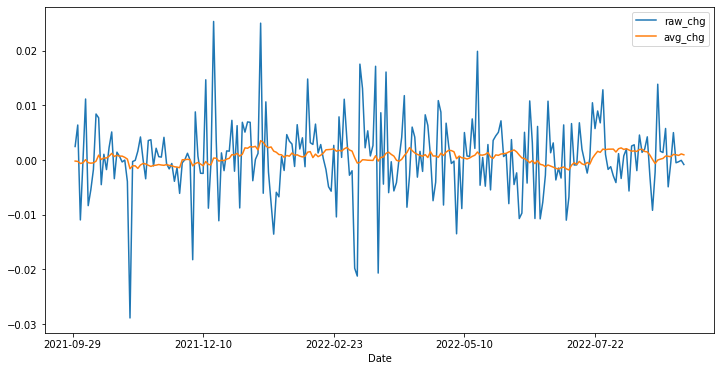

In [19]:
df1[['raw_chg','avg_chg']].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

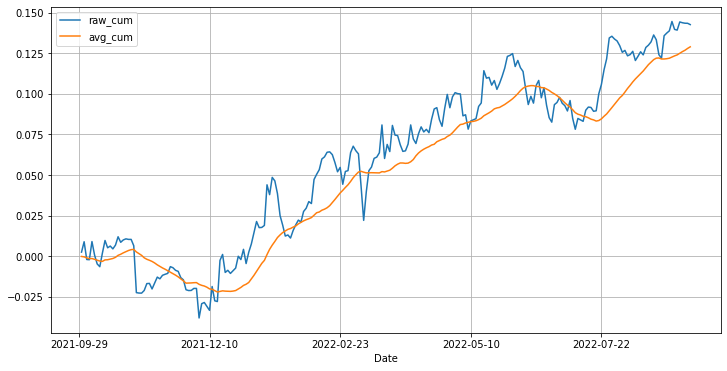

In [20]:
df1['raw_cum'] = df1['raw_chg'].cumsum()
df1['avg_cum'] = df1['avg_chg'].cumsum()
df1[['raw_cum','avg_cum']].plot(figsize=(12,6),grid=True)

<AxesSubplot:xlabel='Date'>

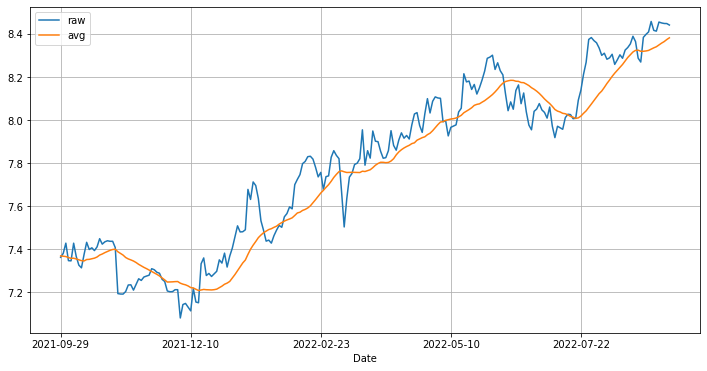

In [21]:
df1[['raw','avg']].plot(figsize=(12,6),grid=True)

<AxesSubplot:>

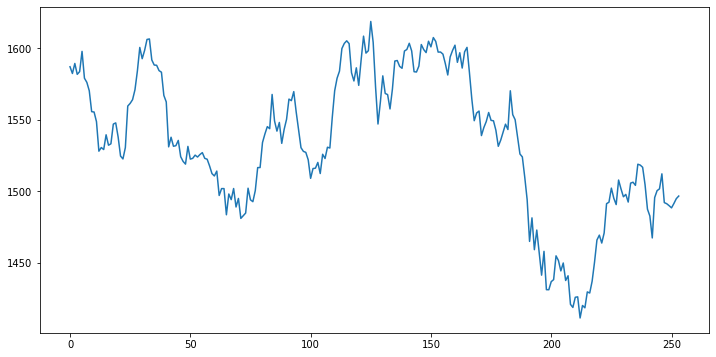

In [22]:
# df3 = pd.read_csv(filepath + 'klse_stocks.csv')
# df3 = df3.set_index('Date')
# df3['^KLSE'].loc['09/02/2021':'2022/09/02'].plot(figsize=(12,6))
df['^KLSE'].plot(figsize=(12,6))

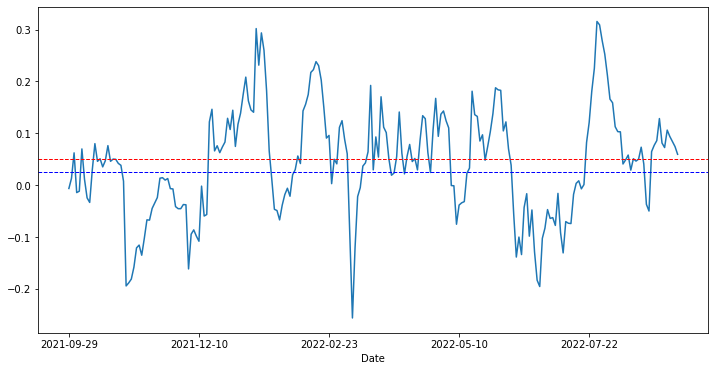

In [23]:
df1['Buy'] = df1.raw-df1.avg 
ax = df1['Buy'].plot(figsize=(12,6))
ax.axhline(y=0.05,color='r', linestyle='--', lw=1)
ax.axhline(y=0.025,color='b', linestyle='--', lw=1)

In [24]:
df1[['raw','avg','Buy']].tail(30)

raw     avg     Buy
Date                              
2022-07-29  8.3688  8.0901  0.2787
2022-08-01  8.3587  8.1062  0.2525
2022-08-02  8.3347  8.1225  0.2121
2022-08-03  8.3004  8.1345  0.1659
2022-08-04  8.3102  8.1514  0.1587
2022-08-05  8.2823  8.1697  0.1126
2022-08-08  8.2886  8.1855  0.1031
2022-08-09  8.3053  8.2026  0.1027
2022-08-10  8.2584  8.2177  0.0407
2022-08-11  8.2797  8.2311  0.0486
2022-08-12  8.3029  8.2449  0.0580
2022-08-15  8.2869  8.2580  0.0289
2022-08-16  8.3248  8.2739  0.0509
2022-08-17  8.3366  8.2903  0.0463
2022-08-18  8.3535  8.3034  0.0501
2022-08-19  8.3890  8.3159  0.0731
2022-08-22  8.3642  8.3235  0.0407
2022-08-23  8.2874  8.3245 -0.0371
2022-08-24  8.2692  8.3192 -0.0500
2022-08-25  8.3839  8.3193  0.0646
2022-08-26  8.3975  8.3207  0.0768
2022-08-29  8.4091  8.3232  0.0859
2022-08-30  8.4577  8.3294  0.1283
2022-09-01  8.4163  8.3352  0.0812
2022-09-02  8.4127  8.3403  0.0724
2022-09-05  8.4550  8.3489  0.1061
2022-09-06  8.4509  8.3570  0.0938
2022-09-07  8.4483  8.3642  0.0841
2022-09-08  8.4480  8.3737  0.0743
2022-09-09  8.4412  8.3817  0.0594

In [25]:
df1['Buy'].loc[df1.Buy>0].describe()

count    157.0000
mean       0.0997
std        0.0704
min        0.0010
25%        0.0479
50%        0.0822
75%        0.1388
max        0.3156
Name: Buy, dtype: float64

In [26]:
df1['Buy'].loc[df1.Buy<0].describe()

count    78.0000
mean     -0.0705
std       0.0557
min      -0.2562
25%      -0.0998
50%      -0.0567
75%      -0.0322
max      -0.0009
Name: Buy, dtype: float64

In [27]:
profit = (df1['raw'].iloc[-1]-df1['raw'].iloc[0])/df1['raw'].iloc[0]
print('% profit: ',profit*100)

% profit:  14.651899464827281


In [44]:
(14.6/df1.shape[0])*252

15.656170212765957

In [28]:
# profit = (df1['raw'].iloc[252]-df1['raw'].iloc[0])/df1['raw'].iloc[0]
# print('% profit: ',profit*100)

In [29]:
cap = 20000
w1 = [val * cap for val in w]
w1

[2958.0, 2819.9999999999995, 5262.0, 3668.0, 5286.0]

In [30]:
df1.iloc[-1,:l]

1295.KL     4.69
5200.KL     1.72
5209.KL     3.50
4863.KL     5.81
5819.KL    20.88
Name: 2022-09-09, dtype: float64

In [31]:
w1/df1.iloc[-1,:l]

1295.KL     630.7036
5200.KL    1639.5349
5209.KL    1503.4286
4863.KL     631.3253
5819.KL     253.1609
Name: 2022-09-09, dtype: float64

### Max Draw Down

In [32]:
Roll_Max = df1['raw'].cummax()
Daily_Drawdown =  df1['raw']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()
print('Raw Max DD: ',Max_Daily_Drawdown)

Raw Max DD:  Date
2021-09-29    0.0000
2021-09-30    0.0000
2021-10-01    0.0000
2021-10-04   -0.0109
2021-10-05   -0.0111
               ...  
2022-09-05   -0.0494
2022-09-06   -0.0494
2022-09-07   -0.0494
2022-09-08   -0.0494
2022-09-09   -0.0494
Name: raw, Length: 235, dtype: float64


In [33]:
Roll_Max = df1['avg'].cummax()
Daily_Drawdown =  df1['avg']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()
print('Avg Max DD: ',Max_Daily_Drawdown)

Avg Max DD:  Date
2021-09-29    0.0000
2021-09-30   -0.0002
2021-10-01   -0.0004
2021-10-04   -0.0010
2021-10-05   -0.0015
               ...  
2022-09-05   -0.0259
2022-09-06   -0.0259
2022-09-07   -0.0259
2022-09-08   -0.0259
2022-09-09   -0.0259
Name: avg, Length: 235, dtype: float64


In [34]:
df1['Cumulative'] = df1.raw_chg.cumsum().round(2)
df1['HighValue'] = df1['Cumulative'].cummax()
df1['raw_dd'] = df1['Cumulative'] - df1['HighValue']

df1['Cumulative'] = df1.avg_chg.cumsum().round(2)
df1['HighValue'] = df1['Cumulative'].cummax()
df1['avg_dd'] = df1['Cumulative'] - df1['HighValue']

<AxesSubplot:xlabel='Date'>

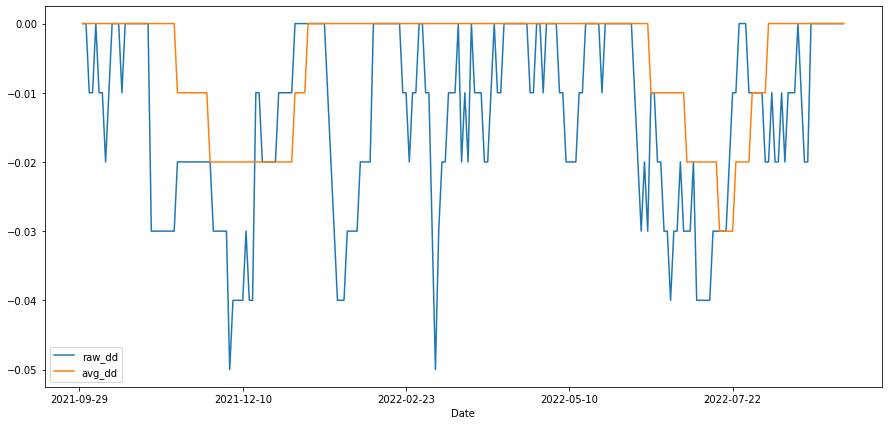

In [35]:
df1[['raw_dd','avg_dd']].plot(figsize=(15,7))

In [36]:
df1['shifted_price'] = df1.raw.shift()

In [37]:
cond = [df1.raw - df1.avg > 0.04, df1.raw - df1.avg < -0.03]
choices = ['Buy','Sell']
df1['Signal'] = np.select(cond,choices)

In [38]:
df1['Signal'].value_counts()

Buy     129
Sell     59
0        47
Name: Signal, dtype: int64

In [39]:
df1.Signal = df1.Signal.shift()

In [40]:
#https://klse.i3investor.com/web/hti/brokers
fees = 0.004
position = False
buydates,selldates = [],[]
buyprices,sellprices = [],[]
for index,row in df1.iterrows():
    if not position and row['Signal'] == 'Buy':
        buydates.append(index)
        buyprice1 = row.raw + (row.raw*fees)
        #buyprice1 = row.shifted_price + (row.shifted_price*fees)
        print('Buy ',buyprice1)
         #print(buyprices)
        #buyprices.append(row.raw)
        buyprices.append(buyprice1)
        position = True
        
    if position:
        if row['Signal'] == 'Sell' or row.shifted_price < 0.5 * buyprices[-1]:
            selldates.append(index)
            sellprice1 = row.raw - (row.raw*fees)
            #sellprice1 = row.shifted_price - (row.shifted_price*fees)
            print('Sell ',sellprice1)
            sellprices.append(sellprice1)
            position = False
        

Buy  7.376150247075938
Sell  7.345537442183876
Buy  7.42818931621208
Sell  7.1630364748406405
Buy  7.38883111803875
Sell  7.412455161847401
Buy  7.617613952363871
Sell  7.473297891320801
Buy  7.8515571968754765
Sell  7.9342579126298896
Buy  8.209756462396813
Sell  8.011093931223964
Buy  8.171509760916615
Sell  8.23614190774641
Buy  8.431042930127333


In [41]:
plt.figure(figsize=(16,8))
plt.plot(df1.raw)
plt.plot(df1.avg)

plt.scatter(df1.loc[buydates].index,df1.loc[buydates].raw,marker='^',color='g')
plt.scatter(df1.loc[selldates].index,df1.loc[selldates].raw,marker='>',color='r')

In [60]:
pd.DataFrame(sellprices,buyprices)

0
9.5637    9.3114
9.3033   10.8730
11.5069  11.3857
10.0182   9.9403

In [52]:
buyprices

[9.563699823930836, 9.303295619512022, 11.506913471467723, 10.01823887031795]

In [43]:
(pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)]) + 1)#.prod()

0    0.9958
1    0.9643
2    1.0032
3    0.9811
4    1.0105
5    0.9758
6    1.0079
dtype: float64